## Import Statements

In [1]:
import pandas as pd
import math
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

## Reading the Data Files

In [2]:
data_sonar = pd.read_csv("Ex07_Sonar_Regreesion.csv")

In [3]:
data_sonar['pH'].fillna((data_sonar['pH'].mean()), inplace=True)

## Basic Analysis

In [4]:
data_sonar.corr()

,EchoTime,WaterTemp,Clconcentration,Salinity,pH,Distance
EchoTime,1.000000,-0.046306,-0.074808,-0.074808,0.097267,1.000000
WaterTemp,-0.046306,1.000000,0.103123,0.103123,-0.051291,-0.046305
Clconcentration,-0.074808,0.103123,1.000000,1.000000,0.083527,-0.074809
Salinity,-0.074808,0.103123,1.000000,1.000000,0.083527,-0.074809
pH,0.097267,-0.051291,0.083527,0.083527,1.000000,0.097266
Distance,1.000000,-0.046305,-0.074809,-0.074809,0.097266,1.000000


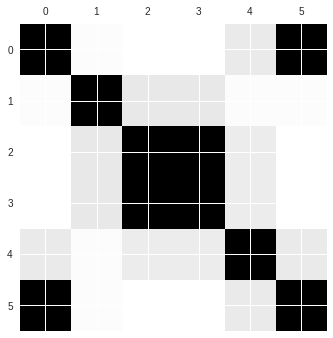

In [5]:
plt.matshow(data_sonar.corr())
plt.show()

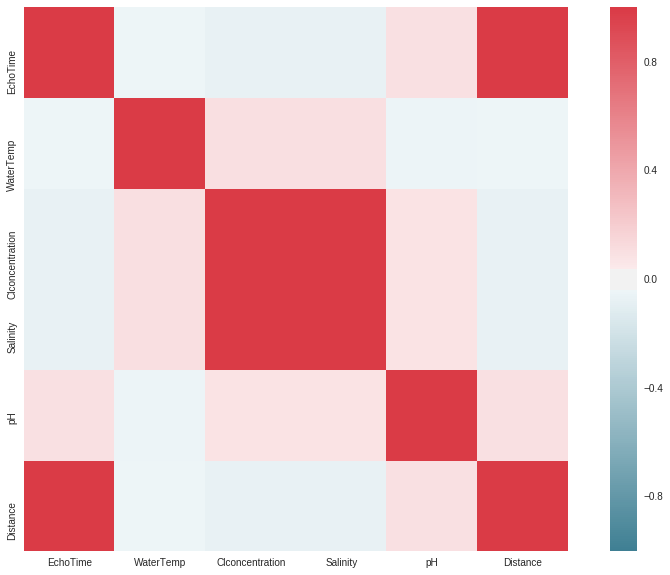

In [6]:
f, ax = plt.subplots(figsize=(15, 10))
corr = data_sonar.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

## Scatter plots regressors vs regressand

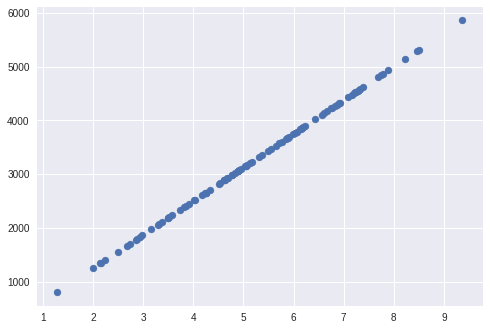

In [7]:
plt.scatter(data_sonar.EchoTime, data_sonar.Distance)
plt.show()

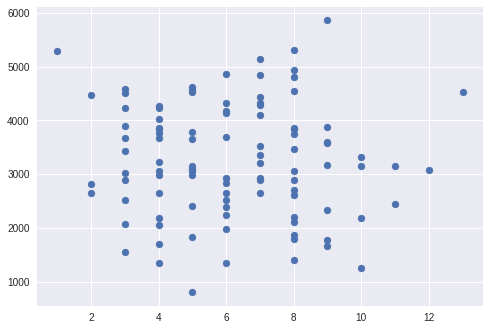

In [8]:
plt.scatter(data_sonar.WaterTemp, data_sonar.Distance)
plt.show()

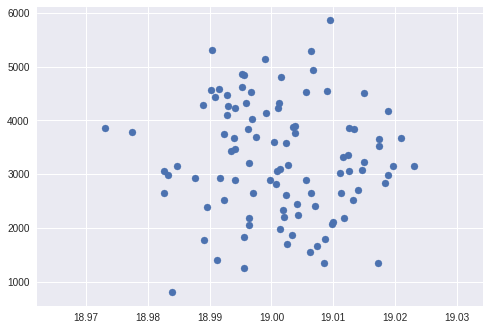

In [9]:
plt.scatter(data_sonar.Clconcentration, data_sonar.Distance)
plt.show()

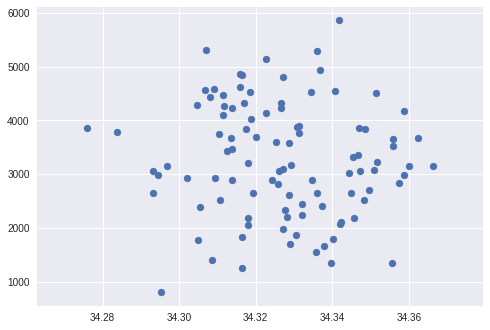

In [10]:
plt.scatter(data_sonar.Salinity, data_sonar.Distance)
plt.show()

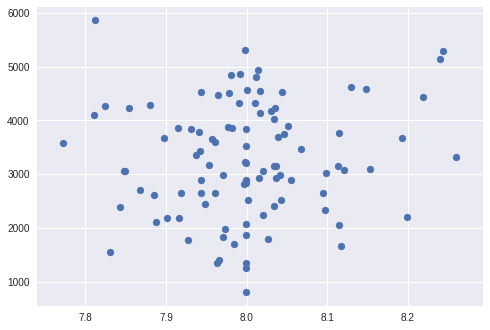

In [11]:
plt.scatter(data_sonar.pH, data_sonar.Distance)
plt.show()

## Creating the train and test datasets

In [12]:
data_sonar_y = data_sonar['Distance']
data_sonar_x = data_sonar.drop(['Distance'], axis=1)

In [13]:
data_sonar_x_train = data_sonar_x[:int(0.6*len(data_sonar_x))]
data_sonar_y_train = data_sonar_y[:int(0.6*len(data_sonar_y))]
data_sonar_x_test = data_sonar_x[int(0.6*len(data_sonar_x)):]
data_sonar_y_test = data_sonar_y[int(0.6*len(data_sonar_y)):]

## Standardising the Data

In [14]:
data_sonar_stan_x_train = (data_sonar_x_train-data_sonar_x_train.mean())/data_sonar_x_train.std()
data_sonar_stan_y_train = (data_sonar_y_train-data_sonar_y_train.mean())/data_sonar_y_train.std()
data_sonar_stan_x_test = (data_sonar_x_test-data_sonar_x_test.mean())/data_sonar_x_test.std()

## Linear Regression Model

In [15]:
reg = linear_model.LinearRegression()
reg.normalize=True
reg.fit (data_sonar_stan_x_train, data_sonar_stan_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [16]:
tr_coeffs = reg.coef_
tr_resi = reg.residues_
tr_intr = reg.intercept_
print("Coeffs: ", tr_coeffs)
print("Residuals: ", tr_resi)
print("Intercept: ", tr_intr)

Coeffs:  [  1.00000026e+00   1.27191126e-06  -7.01955326e+05   7.01955326e+05
  -8.64201068e-07]
Residuals:  3.19304388237e-09
Intercept:  2.12260739344e-07


/home/user/StackRoute/Assignments/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


In [17]:
pred_lin = reg.predict(data_sonar_stan_x_test)

In [18]:
pred_lin = (pred_lin*data_sonar_y_test.std())+data_sonar_y_test.mean()

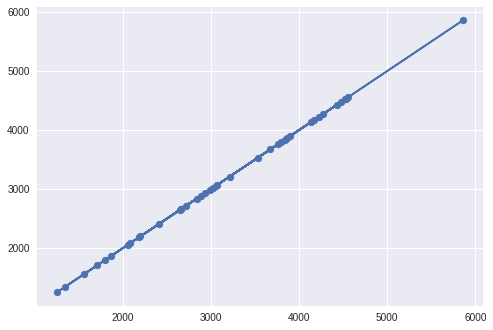

In [19]:
plt.scatter(data_sonar_y_test, pred_lin)
plt.plot(data_sonar_y_test, data_sonar_y_test)
plt.show()

In [20]:
errors_abs = np.abs(data_sonar_y_test-pred_lin)
errors = data_sonar_y_test-pred_lin

In [21]:
errors.mean()

9.7023952832842045e-06

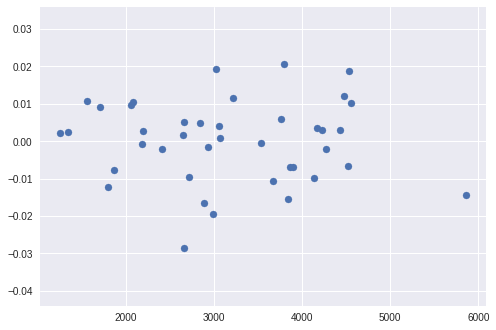

In [22]:
plt.scatter(data_sonar_y_test, errors)
plt.show()

In [23]:
y = pd.DataFrame(errors)

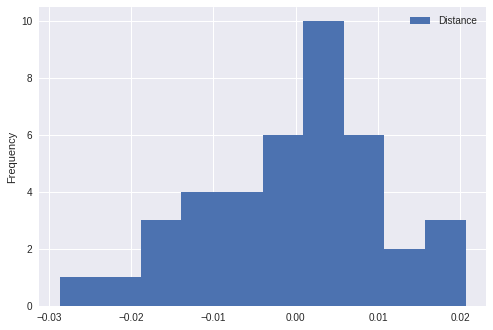

In [24]:
y.plot(kind = 'hist')
plt.show()

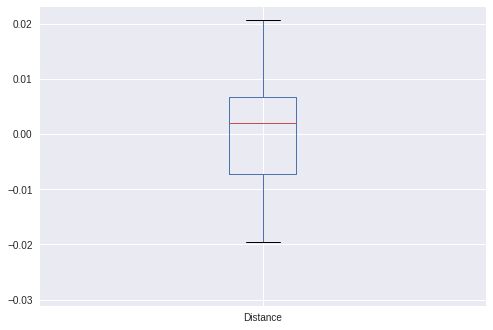

In [25]:
y.plot(kind = 'box')
plt.show()

## Linear Regression Model : Ridge

In [26]:
alphas_r = np.linspace(0.0001,15,1000)*0.5

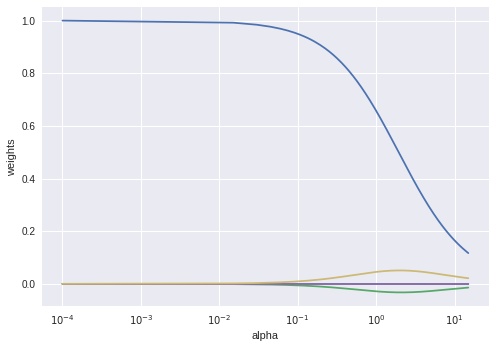

In [27]:
ridge = linear_model.Ridge(normalize=True)
coeffs = []
for a in alphas_r:
    ridge.set_params(alpha=a)
    ridge.fit(np.array(data_sonar_stan_x_train), np.array(data_sonar_stan_y_train))
    coeffs.append(ridge.coef_)
ax = plt.gca()
ax.plot(2*alphas_r, coeffs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

In [29]:
ridgecv = linear_model.RidgeCV(alphas=alphas_r, scoring='neg_mean_squared_error', normalize=True)
ridgecv.fit(np.array(data_sonar_stan_x_train), np.array(data_sonar_stan_y_train))
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(np.array(data_sonar_stan_x_train), np.array(data_sonar_stan_y_train))
pred = ridge.predict(data_sonar_stan_x_test)
mean_squared_error(data_sonar_y_test, (pred*data_sonar_y_test.std())+data_sonar_y_test.mean())

0.0034351994525119848

In [30]:
print(pd.Series(ridge.coef_, index=data_sonar_stan_x_test.columns))
print("Intercept: ", ridge.intercept_)
print("Aplha: ", ridge.alpha)

EchoTime           9.999473e-01
WaterTemp         -4.852073e-06
Clconcentration   -3.643993e-07
Salinity          -3.643986e-07
pH                 9.534157e-06
dtype: float64
Intercept:  -2.29999593553e-16
Aplha:  5e-05


In [31]:
pred_ridge = ridge.predict(np.array(data_sonar_stan_x_test))

In [32]:
pred_ridge = (pred_ridge*data_sonar_y_test.std())+data_sonar_y_test.mean()

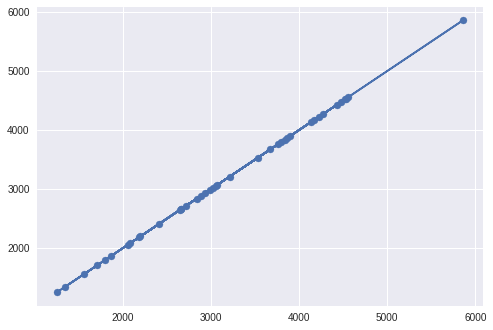

In [33]:
plt.scatter(data_sonar_y_test, pred_ridge)
plt.plot(data_sonar_y_test, data_sonar_y_test)
plt.show()

In [55]:
errors_abs = np.abs(np.array(data_sonar_y_test) - pred_ridge)
errors = np.array(data_sonar_y_test).reshape(40,1) - pred_ridge.reshape(40,1)

In [56]:
errors.mean()

-4.0358827391173689e-13

In [57]:
errors.var()

0.0034351994525119848

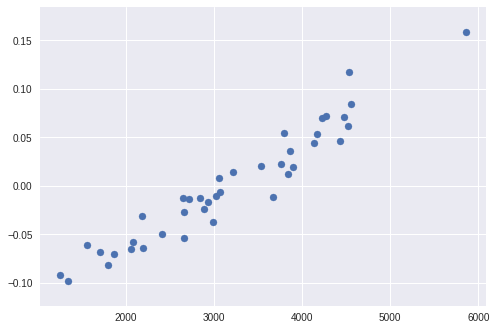

In [36]:
plt.scatter(np.array(data_sonar_y_test).reshape(40,1), errors)
plt.show()

## Histogram of Errors - Ridge

In [37]:
y = pd.DataFrame(errors)

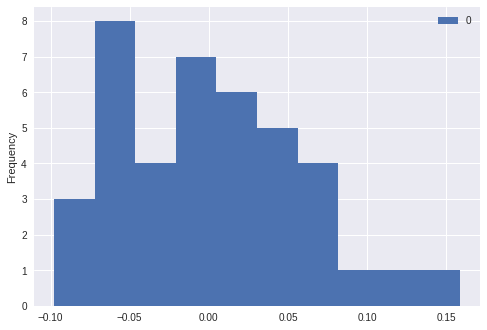

In [38]:
y.plot(kind = 'hist')
plt.show()

## Box Plot

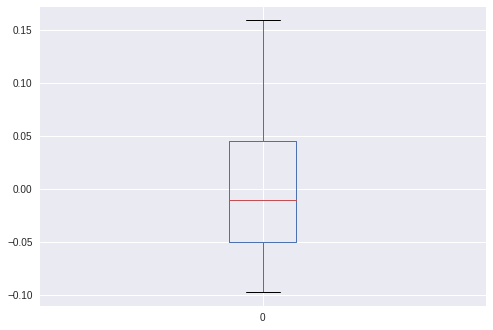

In [39]:
y.plot(kind = 'box')
plt.show()

## Linear Regression Model : Lasso

In [40]:
alphas = np.linspace(0.0001,0.5,1000)*0.5

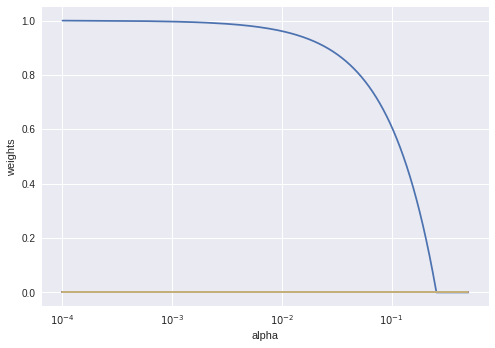

In [41]:
lasso = linear_model.Lasso(max_iter = 10000, normalize=True)
coeffs = []
for al in alphas:
    lasso.set_params(alpha=al)
    lasso.fit(np.array(data_sonar_stan_x_train), np.array(data_sonar_stan_y_train))
    coeffs.append(lasso.coef_)
ax = plt.gca()
ax.plot(2*alphas, coeffs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

In [42]:
lassocv = linear_model.LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(np.array(data_sonar_stan_x_train), np.array(data_sonar_stan_y_train))
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(np.array(data_sonar_stan_x_train), np.array(data_sonar_stan_y_train))
pred = lasso.predict(data_sonar_stan_x_test)
mean_squared_error(data_sonar_y_test, (pred*data_sonar_y_test.std())+data_sonar_y_test.mean())

1.1131574365840167

In [43]:
print(pd.Series(lasso.coef_, index=data_sonar_stan_x_test.columns))
print("Intercept: ", lasso.intercept_)
print("Aplha: ", lasso.alpha)

EchoTime           0.999
WaterTemp         -0.000
Clconcentration   -0.000
Salinity          -0.000
pH                 0.000
dtype: float64
Intercept:  -2.30653921911e-16
Aplha:  0.000128019095794


In [44]:
pred_lasso = lasso.predict(np.array(data_sonar_stan_x_test))

In [45]:
pred_lasso = (pred_lasso*data_sonar_y_test.std())+data_sonar_y_test.mean()

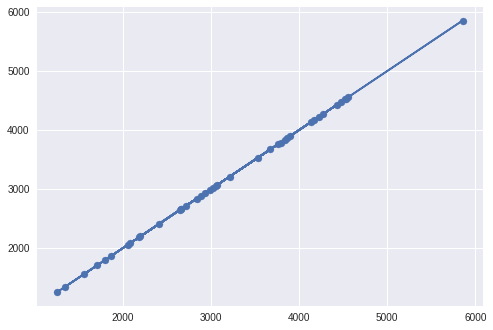

In [46]:
plt.scatter(data_sonar_y_test, pred_lasso)
plt.plot(data_sonar_y_test, data_sonar_y_test)
plt.show()

In [59]:
errors_abs = np.abs(np.array(data_sonar_y_test) - pred_lasso)
errors = np.array(data_sonar_y_test).reshape(40,1) - pred_lasso.reshape(40,1)

In [60]:
errors.mean()

-4.0358827391173689e-13

In [61]:
errors.var()

1.1131574365840167

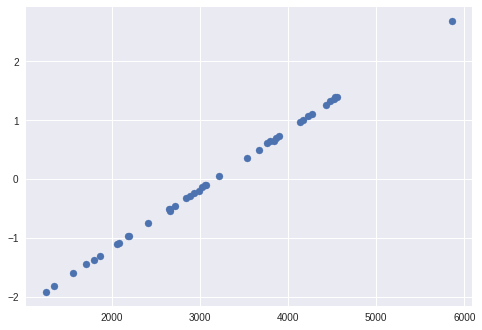

In [62]:
plt.scatter(np.array(data_sonar_y_test).reshape(40,1), errors)
plt.show()

## Histogram of Errors - Lasso

In [63]:
y = pd.DataFrame(errors)

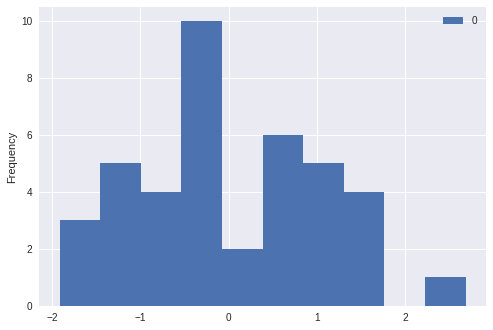

In [64]:
y.plot(kind = 'hist')
plt.show()

## Box Plot

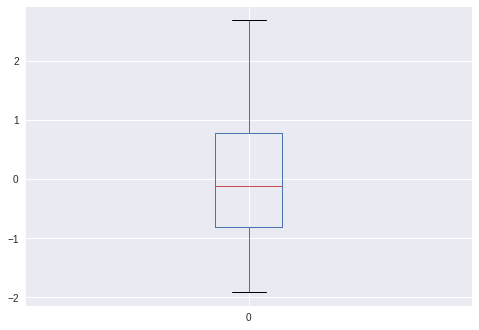

In [52]:
y.plot(kind = 'box')
plt.show()